<a href="https://colab.research.google.com/github/sanidhya-sitaula/Deep-Learning-Breed-Recognition/blob/master/Dog_Vision_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dog Classification 😺

## 1. Problem 

Identifying the breed of the dog given one of it's images. 

## 2. Data

Data imported from Kaggle 

## 3. Evaluation 

The evaluation is a file with prediction probabilities for each dog breed of each test breed image. 

## 4. Features 

Some info about the data:

* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning. 
* There are 120 breeds of dogs (this means there are 120 different classes) 
* There are around 10,000+ images in the training set (these images have labels)
* There are around 10,000+ images in the test set (these images have no labels [we predict them])

In [0]:
## Unzip the data into google drive
##!unzip "drive/My Drive/Dog Vision 2 /dog-breed-identification.zip" -d "drive/My Drive/Dog Vision 2"

## Get our workspace ready

* Import TF
* Make sure we're using a GPU



In [2]:
# Import TensorFlow into Colab

import tensorflow as tf 
print("TF version:", tf.__version__)

TF version: 2.2.0


In [3]:
# Import necessary tools 
import tensorflow_hub as hub 
print("TF Hub version:", hub.__version__) 

TF Hub version: 0.8.0


## Getting our data ready (turning it into tensors) 

With all machine learning models, our data has to be in numerical format. So, that's what we'll be doing first. Turning our images into tensors. (Numerical representations)

Let's start by accessing our data and checking out the labels. 

In [4]:
# Checkout the labels of our data

import pandas as pd 
labels_csv = pd.read_csv("drive/My Drive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     3a61bf86888f00496c9425b305a42a60  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [6]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


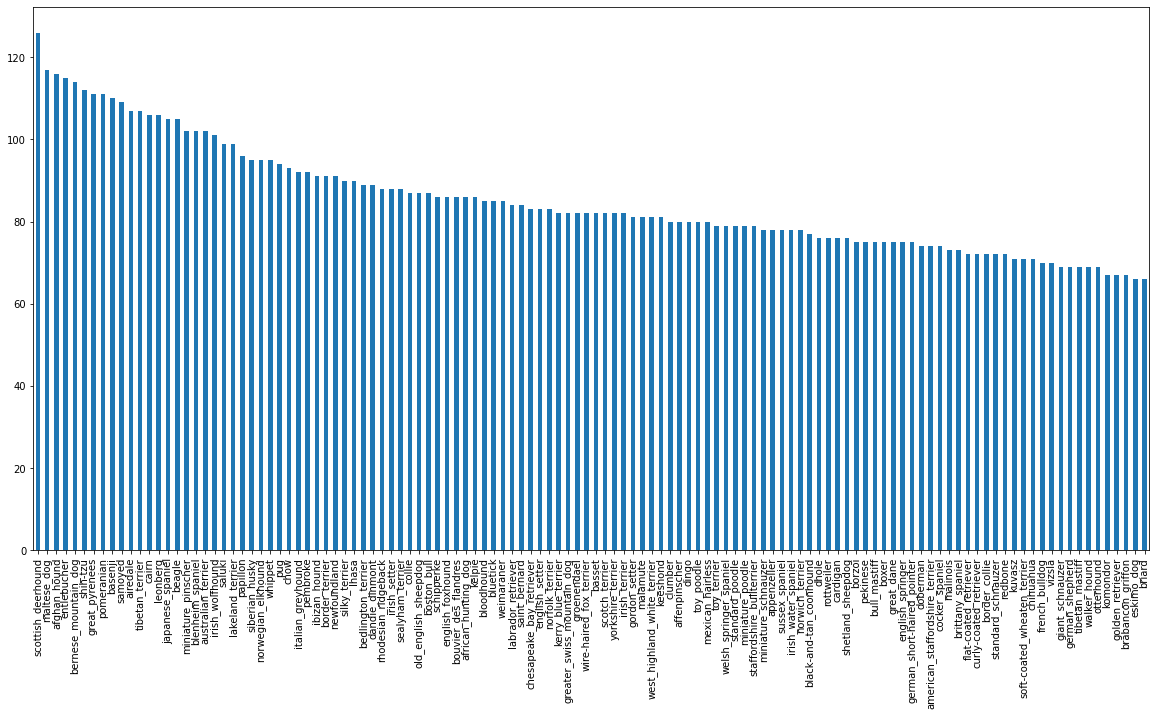

In [8]:
# How many images are there of each breed 

labels_csv["breed"].value_counts().plot.bar(figsize = (20,10))

In [9]:
labels_csv["breed"].value_counts().median()

82.0

In [5]:
from IPython.display import Image
Image("drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

KeyboardInterrupt: ignored

### Getting images and their labels 

Let's get a list of all of our image file pathnames. 

In [6]:
# Create pathnames from image ID's 

filenames = ["drive/My Drive/Dog Vision/train/"+fname+".jpg" for fname in labels_csv["id"]] 

# Check the first 10 
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [7]:
# Check whether number of filnames matches number of actual image files 

import os 
if len(os.listdir("drive/My Drive/Dog Vision/train/")) == len(filenames):
  print("Filenames match actual amount of files. Proceed.")
else:
  print("Filenames do not match.")

Filenames match actual amount of files. Proceed.


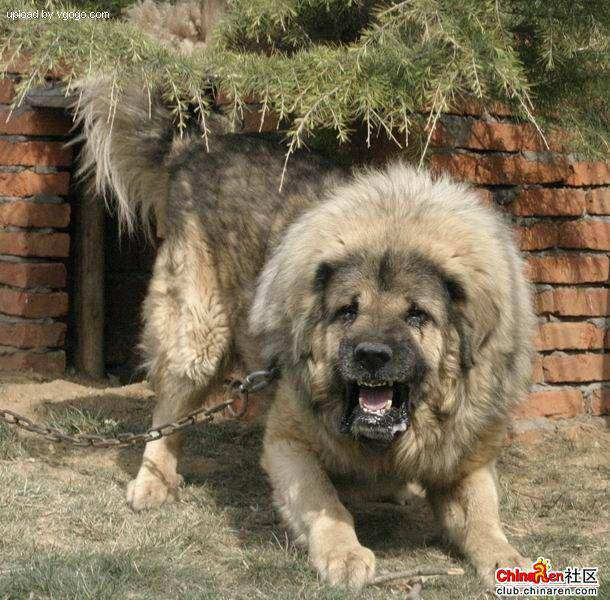

In [17]:
# One more check 

Image(filenames[9000])

In [18]:
labels_csv["breed"][9000]

'tibetan_mastiff'

Since we've now got our training image filepaths in a list, let's prepare our labels. 

In [8]:
import numpy as np 
labels = labels_csv["breed"].to_numpy()
len(labels)

10222

In [9]:
#See if number of labels matches the number of filenames 

if len(labels) == len(filenames):
  print("match")
else:
  print("no match")


match


In [10]:
# Find unique label values 

unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [11]:
# Turn a single label into an array of booleans 

print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [12]:
# Turn every label into a boolean array 
boolean_labels = [label == unique_breeds for label in labels]
len(boolean_labels)

10222

In [13]:
# Example: Turning boolean array into integers 

print(labels[0]) #original label 
print(np.where(unique_breeds == labels[0])) #index where label occurs
print(boolean_labels[0].argmax()) #index where label occurs in boolean array 
print(boolean_labels[0].astype(int)) #there will be a 1 where the sample occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [14]:
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

## Creating our own validation set 
Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own.

In [0]:
# Setup X & y variables 

X = filenames 
y = boolean_labels

In [16]:
len(filenames)

10222

We're going to start off experimenting with ~1000 images and increase as needed.

In [0]:
# Set number of images to use for experimenting 
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [18]:
#Let's split our data into train and validation sets 
from sklearn.model_selection import train_test_split 

#Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], 
                                                  y[:NUM_IMAGES], 
                                                  test_size = 0.2, 
                                                  random_state = 42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [19]:
#Let's have a geez at the training data 
X_train[:5], y_train[:2]

(['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fa

###Preprocessing images (turning images into Tensors)